<a href="https://colab.research.google.com/github/ndsoi/MachineLearning/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 调用PCA模型，对iris数据集进行降维

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 导入3D绘图模块
def draw2d(X_pca,y):
  # 可视化结果（可选）
  plt.figure(figsize=(8, 6))
  colors = ['red', 'blue', 'green']
  for i, target_name in enumerate(iris.target_names):
      plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], alpha=0.8, color=colors[i],
                  label=target_name)
  plt.legend(loc='best', shadow=False, scatterpoints=1)
  plt.title('PCA of IRIS dataset')
  plt.show()

def draw3d(X_pca,y):
  # 绘制三维散点图
  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111, projection='3d')  # 创建一个3D坐标轴
  colors = ['red', 'blue', 'green']
  for i, target_name in enumerate(iris.target_names):
      ax.scatter(X_pca[y == i, 0], X_pca[y == i, 1], X_pca[y == i, 2], alpha=0.8, color=colors[i], label=target_name)
  ax.legend(loc='best', shadow=False, scatterpoints=1)
  ax.set_xlabel('PCA Feature 1')
  ax.set_ylabel('PCA Feature 2')
  ax.set_zlabel('PCA Feature 3')
  ax.set_title('PCA of IRIS dataset (3D)')
  plt.show()

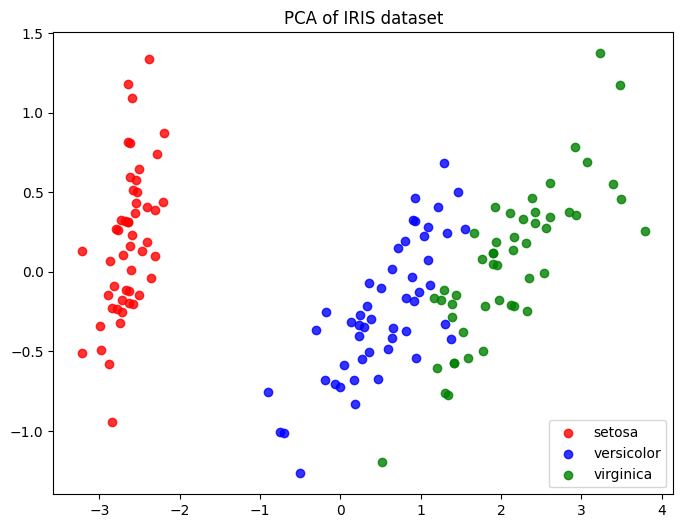

In [47]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA


# 加载数据集
iris = load_iris()
X = iris.data
y = iris.target

# 设置PCA降维的维度为2
pca = PCA(n_components=2)

# 执行PCA降维
X_pca = pca.fit_transform(X)
draw2d(X_pca,y)


## 手搓pca过程
1. 首先对样本数据中心化，达到 $$\sum_{i=1}^mx_i = 0$$
2. 对矩阵 $XX^T$进行特征值分解
3. 选取最大的d个特征值，其对应的特征向量$w_d$即构成了投影矩阵 $W=\{d_1,d_2,..,d_n \}$


数据集的维度(150, 4)
协方差矩阵的维度(4, 4)
投影矩阵W=[[ 0.36138659 -0.65658877 -0.58202985]
 [-0.08452251 -0.73016143  0.59791083]
 [ 0.85667061  0.17337266  0.07623608]
 [ 0.3582892   0.07548102  0.54583143]],W.shape=(4, 3)


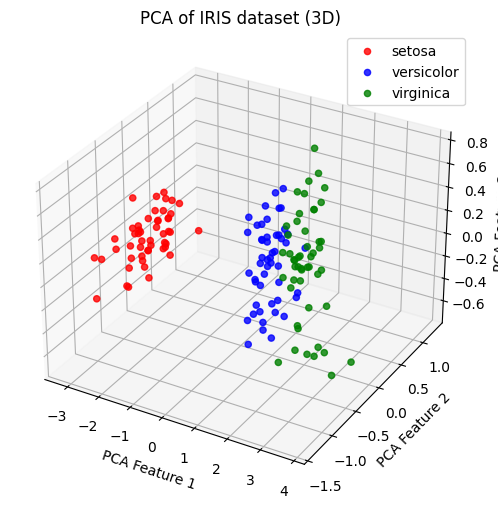

In [52]:
from sklearn.datasets import load_iris
import numpy as np

# 加载数据集
iris = load_iris()
X = iris.data
y = iris.target

## 中心化就是减去均值
X = X-np.mean(X,axis=0)
m,d = X.shape
print(f'数据集的维度{m,d}')
XXT = np.dot(X.T,X)
print(f'协方差矩阵的维度{XXT.shape}')
eigenvalues,eigenvectors = np.linalg.eig(XXT)
d = 3
index = np.argsort(-eigenvalues)[:d]
W = eigenvectors[:,index]   ## 注意是index对应的列，即取相应的特征
print(f'投影矩阵W={W},W.shape={W.shape}')

# 投影后的坐标Z
X_pca = np.dot(X,W)
draw3d(X_pca,y)